In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

df = pd.read_excel('/Users/mihirpamnani/Desktop/Omnify-Analyst-Intership-Task.xlsx','Google Ads Data')

In [22]:
df.shape

(418, 14)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Week            418 non-null    datetime64[ns]
 1   Campaign        418 non-null    object        
 2   Ad group        418 non-null    object        
 3   Keyword type    418 non-null    object        
 4   Search Keyword  412 non-null    object        
 5   Currency        418 non-null    object        
 6   Clicks          418 non-null    int64         
 7   Impressions     418 non-null    int64         
 8   Cost ($)        418 non-null    float64       
 9   Leads           418 non-null    int64         
 10  Prospects       418 non-null    int64         
 11  Payment ($)     8 non-null      object        
 12  Payment Date    8 non-null      datetime64[ns]
 13  Country         418 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(7)
memo

In [24]:
#Preprocessing - Payment($) must be float 

df['Payment ($)'] = df['Payment ($)'].replace('[\$,]', '', regex=True).astype(float)

#Adding the returns column
df['Returns']=round(df['Payment ($)']/df['Cost ($)'],2)

In [25]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('-------------------------')

Week
['2021-01-25T00:00:00.000000000' '2021-02-01T00:00:00.000000000'
 '2021-02-08T00:00:00.000000000' '2021-02-15T00:00:00.000000000'
 '2021-02-22T00:00:00.000000000' '2021-03-01T00:00:00.000000000'
 '2021-03-08T00:00:00.000000000' '2021-03-15T00:00:00.000000000'
 '2021-03-22T00:00:00.000000000' '2021-03-29T00:00:00.000000000'
 '2021-04-05T00:00:00.000000000' '2021-04-12T00:00:00.000000000'
 '2021-04-19T00:00:00.000000000' '2021-04-26T00:00:00.000000000'
 '2021-05-03T00:00:00.000000000']
-------------------------
Campaign
['EK_Generic_Swimming' 'EK_Generic_Quad-Tok_Yoga' 'EK_Generic_Swimming_UK'
 'EK_Generic_Swimming_Canada' 'EK_Generic_Tri-Tok_Reservation'
 'EK_Generic_Quad-Tok_Yoga_Singapore'
 'EK_Generic_Tri-Tok_Reservation_Canada'
 'EK_Generic_Tri-Tok_Reservation_UK' 'EK_Generic_Tri-Tok_Reservation_UAE'
 'EK_Generic_Tri-Tok_Reservation_Singapore' 'EK_Generic_Quad-Tok_Pilates'
 'EK_Generic_Tri-Tok_Yoga_Singapore' 'EK_Generic_Tri-Tok_Pilates'
 'EK_Generic_Tri-Tok_Yoga' 'EK_Generic_S

In [26]:
#Checking for missing values
df.isnull().sum()

Week                0
Campaign            0
Ad group            0
Keyword type        0
Search Keyword      6
Currency            0
Clicks              0
Impressions         0
Cost ($)            0
Leads               0
Prospects           0
Payment ($)       410
Payment Date      410
Country             0
Returns           410
dtype: int64

In [27]:
df.describe()

,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Returns
count,418.000000,418.000000,418.000000,418.000000,418.000000,8.00000,8.000000
mean,0.925837,16.662679,6.671483,0.028708,0.050239,1485.00000,56.958750
std,1.900840,46.743636,14.253019,0.167185,0.285312,616.91861,42.187677
min,0.000000,0.000000,0.000000,0.000000,0.000000,980.00000,18.090000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,980.00000,24.975000
50%,0.000000,3.000000,0.000000,0.000000,0.000000,1188.00000,36.970000
75%,1.000000,12.000000,6.800000,0.000000,0.000000,1938.00000,88.987500
max,12.000000,357.000000,92.090000,1.000000,3.000000,2388.00000,121.590000


/var/folders/p_/f89n2mxs5zj__f5w8jwgv7c40000gn/T/ipykernel_73570/4226894128.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
/var/folders/p_/f89n2mxs5zj__f5w8jwgv7c40000gn/T/ipykernel_73570/4226894128.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


<Axes: >

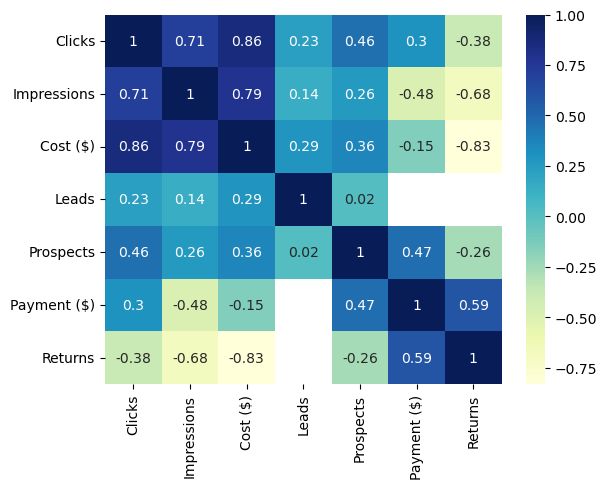

In [28]:
df.corr()
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Above correlation matrix shows strong relationships between following variables (>0.5) :
1. Impressions and Clicks
2. Impressions and Cost
3. Clicks and Cost

<b>EDA - Univarite</b>

In [29]:
#1.Week
print("Dates and their number of data points : \n", df.Week.value_counts())

Dates and their number of data points : 
 2021-03-22    34
2021-02-15    33
2021-02-22    33
2021-03-15    31
2021-02-01    30
2021-03-08    29
2021-04-26    29
2021-05-03    29
2021-01-25    27
2021-03-01    27
2021-04-19    26
2021-02-08    25
2021-03-29    23
2021-04-05    22
2021-04-12    20
Name: Week, dtype: int64


In [30]:
#2. Campaign
print("Campaigns and their number of data points : \n", df.Campaign.value_counts())

Campaigns and their number of data points : 
 EK_Generic_Swimming                         97
EK_Generic_Quad-Tok_Yoga                    47
EK_Generic_Tri-Tok_Reservation              45
EK_Generic_Swimming_UK                      27
EK_Generic_Tri-Tok_Reservation_UK           27
EK_Generic_Tri-Tok_Reservation_UAE          25
EK_Generic_Tri-Tok_Reservation_Canada       24
EK_Generic_Tri-Tok_Yoga                     23
EK_Generic_Tri-Tok_Pilates                  22
EK_Generic_Swimming_Canada                  20
EK_Generic_Quad-Tok_Pilates                 20
EK_Generic_Tri-Tok_Reservation_Singapore    19
EK_Generic_Swimming_Singapore               11
EK_Generic_Quad-Tok_Yoga_Singapore           9
EK_Generic_Tri-Tok_Yoga_Singapore            2
Name: Campaign, dtype: int64


In [31]:
#3. Ad Group
print("Ad Group and their number of data points : \n",df['Ad group'].value_counts())

Ad Group and their number of data points : 
 Reservation_Management_System_Phrase        91
Reservation_Management_System_Exact         49
Pool_Reservation_Software_Broad             48
Yoga_Studio_Booking_Software_Broad          24
Swimming_Pool_Booking_System_Exact          21
Pool_Scheduling_Software_Phrase             20
Swimming_Pool_Reservation_System_Exact      17
Yoga_Studio_Generic_Software_Phrase         17
Pool_Reservation_System_Exact               16
Pool_Reservation_Software_Exact             15
Yoga_Studio_Booking_Software_Exact          15
Pilates_Studio_Management_Software_Exact    11
Pool_Booking_App_Exact                      11
Pilates_Studio_Software_Exact                8
Yoga_Studio_Software_Exact                   8
Pilates_Studio_Booking_Software_Broad        8
Pool_Reservation_Software_Open_Broad         7
Pilates_Studio_Software_Phrase               7
Yoga_Studio_App_Phrase                       6
Yoga_Studio_App_Exact                        6
Pilates_Booking

In [32]:
#4.Keyword Type
print("Keyword Type and their number of data points : \n",df['Keyword type'].value_counts())

Keyword Type and their number of data points : 
 Exact     184
Phrase    145
Broad      89
Name: Keyword type, dtype: int64


In [33]:
#5.Clicks
print("Clicks and their number of data points : \n",df['Clicks'].value_counts())

Clicks and their number of data points : 
 0     263
1      78
2      33
3      12
4      11
5       6
8       5
10      3
7       2
11      2
12      1
6       1
9       1
Name: Clicks, dtype: int64


In [34]:
#6.Impressions
print("Impressions and their number of data points : \n",df['Impressions'].value_counts())

Impressions and their number of data points : 
 1      86
0      64
2      44
3      26
4      19
6      13
5      13
8      11
12     10
9       9
7       8
10      8
13      7
15      7
20      7
11      7
28      5
26      5
14      4
19      3
35      3
18      3
31      3
16      3
34      3
23      3
22      3
40      3
21      2
29      2
199     2
24      2
17      2
27      2
25      2
30      1
154     1
54      1
255     1
264     1
47      1
201     1
51      1
260     1
41      1
263     1
129     1
213     1
45      1
278     1
39      1
277     1
161     1
239     1
33      1
144     1
307     1
357     1
90      1
Name: Impressions, dtype: int64


In [35]:
#7.Cost
print("Cost and their number of data points : \n",df['Cost ($)'].value_counts())

Cost and their number of data points : 
 0.00     263
3.42       2
38.33      1
4.46       1
7.09       1
        ... 
42.26      1
16.96      1
25.75      1
30.32      1
3.77       1
Name: Cost ($), Length: 155, dtype: int64


In [36]:
#8. Prospects
print("Prospects and their number of data points : \n",df['Prospects'].value_counts())

Prospects and their number of data points : 
 0    402
1     13
3      2
2      1
Name: Prospects, dtype: int64


In [37]:
#9.Payment
print("Payment and their number of data points : \n",df['Payment ($)'].value_counts())

Payment and their number of data points : 
 980.0     3
1188.0    2
2388.0    2
1788.0    1
Name: Payment ($), dtype: int64


<b>EDA - Bivarite</b>

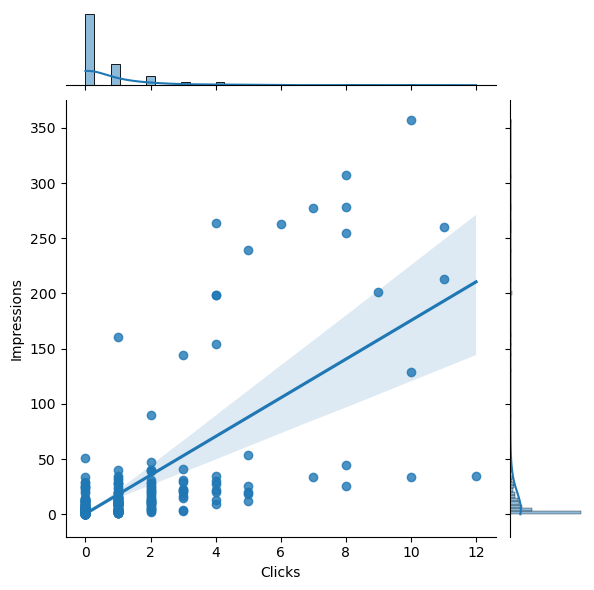

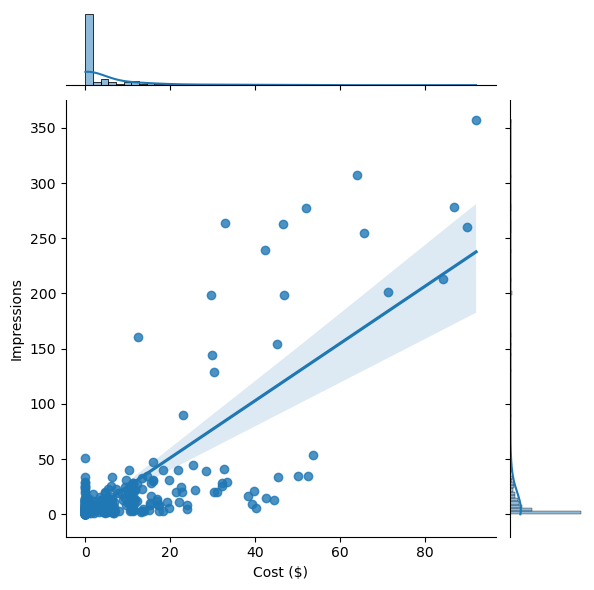

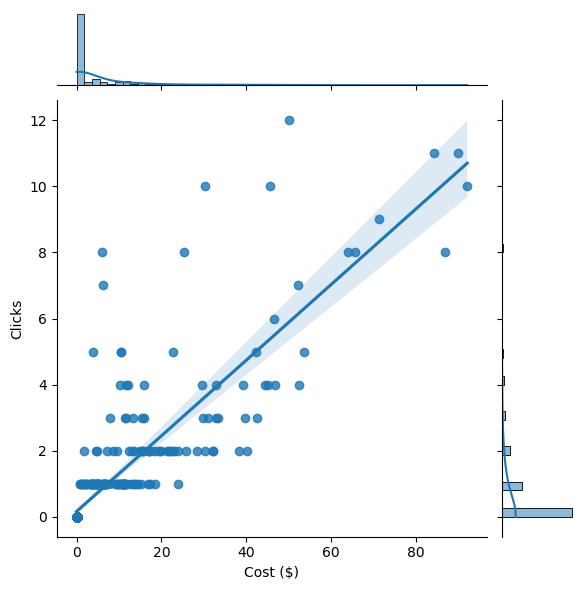

In [39]:
#Co-relation analysis
sns.jointplot(data=df, x="Clicks", y="Impressions", kind="reg")
sns.jointplot(data=df, x="Cost ($)", y="Impressions", kind="reg")
sns.jointplot(data=df, x="Cost ($)", y="Clicks", kind="reg")


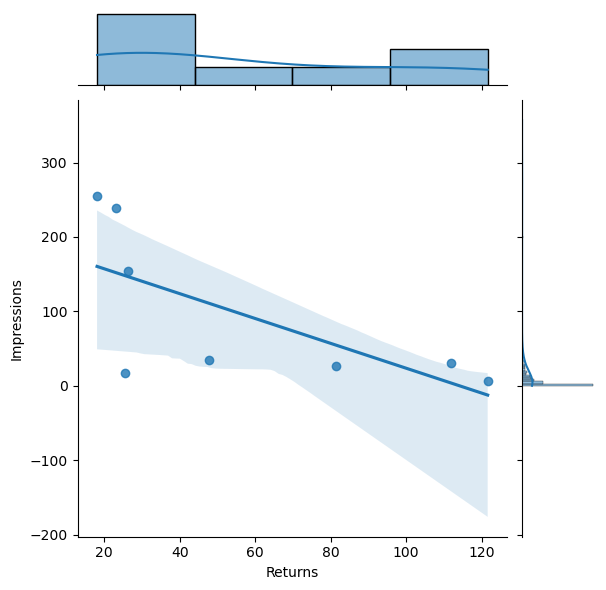

In [42]:
sns.jointplot(data=df, x="Returns", y="Impressions", kind="reg")

<b>EDA - Multivarite</b>

  Keyword type  Clicks  Impressions  Returns
0        Broad     200         4476   178.46
1        Exact      99         1060   137.53
2       Phrase      88         1429   139.68


<AxesSubplot:xlabel='Keyword type'>

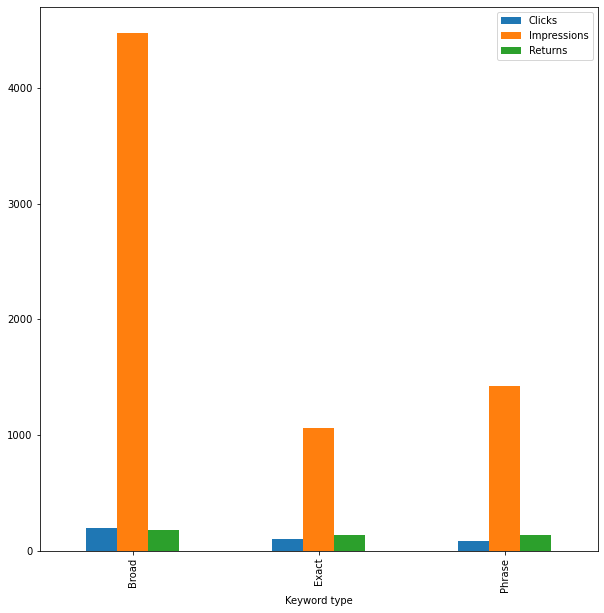

In [41]:
#Keyword Analysis

df_keyword_filtered = df.groupby("Keyword type").agg({'Clicks': 'sum', 'Impressions': 'sum', 'Returns':'sum'}).reset_index()
print(df_keyword_filtered)

df_keyword_filtered.plot(x='Keyword type',kind='bar',figsize = (10, 10))

         Week  Cost ($)  Clicks  Impressions  Payment ($)  Returns
0  2021-01-25    154.79      15          319       2168.0    51.89
1  2021-02-01    192.58      19          373          0.0     0.00
2  2021-02-08    216.13      21          364        980.0    81.33
3  2021-02-15    235.30      35          671       1788.0   111.96
4  2021-02-22    190.90      22          478          0.0     0.00
5  2021-03-01    141.40      14          407        980.0    23.19
6  2021-03-08    258.20      34          503          0.0     0.00
7  2021-03-15    184.36      22          468          0.0     0.00
8  2021-03-22    308.73      46          659       2388.0    47.62
9  2021-03-29    172.11      39          586          0.0     0.00
10 2021-04-05    176.96      29          461          0.0     0.00
11 2021-04-12    137.21      24          324       2388.0   121.59
12 2021-04-19     87.38      19          328          0.0     0.00
13 2021-04-26    103.26      17          487          0.0     

<AxesSubplot:ylabel='Week'>

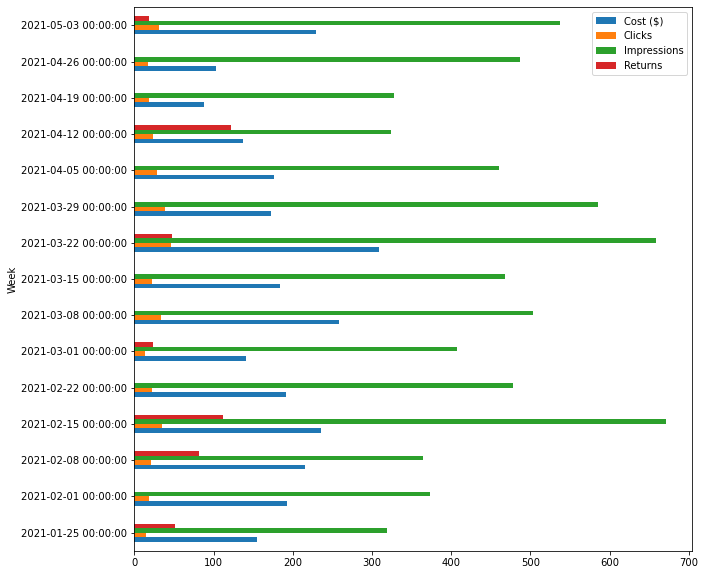

In [44]:
#Weekly Report

df_weekly_filtered = df.groupby("Week").agg({'Cost ($)': 'sum', 'Clicks': 'sum', 'Impressions': 'sum', 'Payment ($)': 'sum', 'Returns':'sum'}).reset_index()
print(df_weekly_filtered)

df_weekly_filtered.drop(['Payment ($)'],axis=1).plot(x='Week',kind='barh',figsize = (10, 10))



array([<AxesSubplot:xlabel='Week'>, <AxesSubplot:xlabel='Week'>,
       <AxesSubplot:xlabel='Week'>, <AxesSubplot:xlabel='Week'>],
      dtype=object)

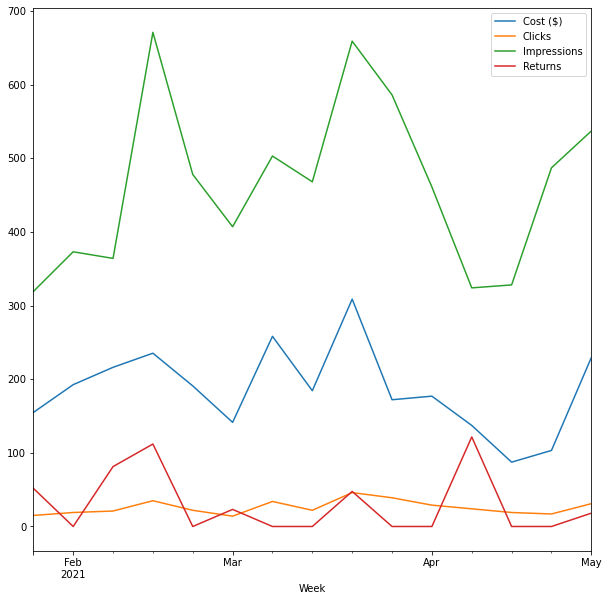

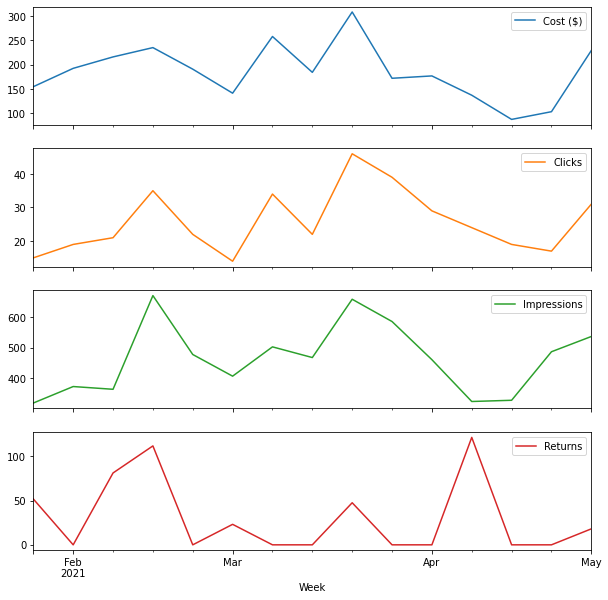

In [43]:
#Time-Series Analysis on Weekly report
df_weekly_filtered.drop(['Payment ($)'],axis=1).plot(x='Week',figsize = (10, 10))
df_weekly_filtered.drop(['Payment ($)'],axis=1).plot(subplots='True',x='Week',figsize = (10, 10))

     Month  Cost ($)  Clicks  Impressions  Payment ($)  Returns
0  2021-01    154.79      15          319       2168.0    51.89
1  2021-02    834.91      97         1886       2768.0   193.29
2  2021-03   1064.80     155         2623       3368.0    70.81
3  2021-04    504.81      89         1600       2388.0   121.59
4  2021-05    229.37      31          537       1188.0    18.09


<AxesSubplot:ylabel='Month'>

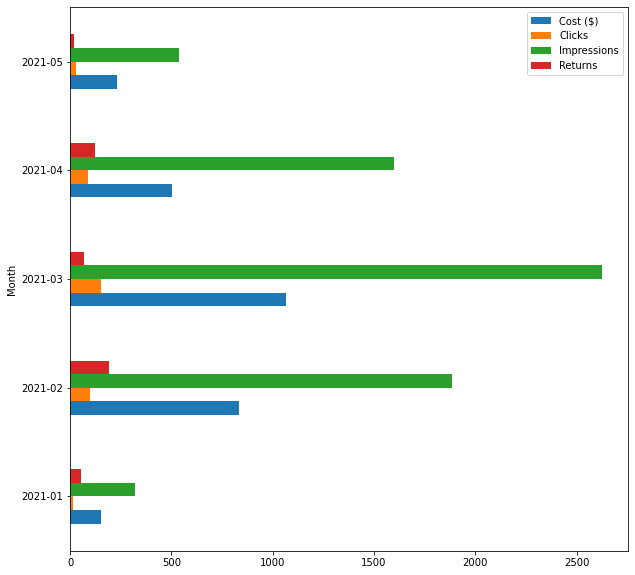

In [38]:
#Monthly Report

month= pd.to_datetime(df['Week']).dt.strftime('%Y-%m')
#df.insert(loc = 0,column = 'Month',value = month)
df.drop(['Week'],axis=1)

df_monthly_filtered = df.groupby("Month").agg({'Cost ($)': 'sum', 'Clicks': 'sum', 'Impressions': 'sum', 'Payment ($)': 'sum','Returns': 'sum'}).reset_index()
print(df_monthly_filtered)

df_monthly_filtered.drop(['Payment ($)'],axis=1).plot(x='Month',kind='barh',figsize = (10, 10))



array([<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
       <AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>],
      dtype=object)

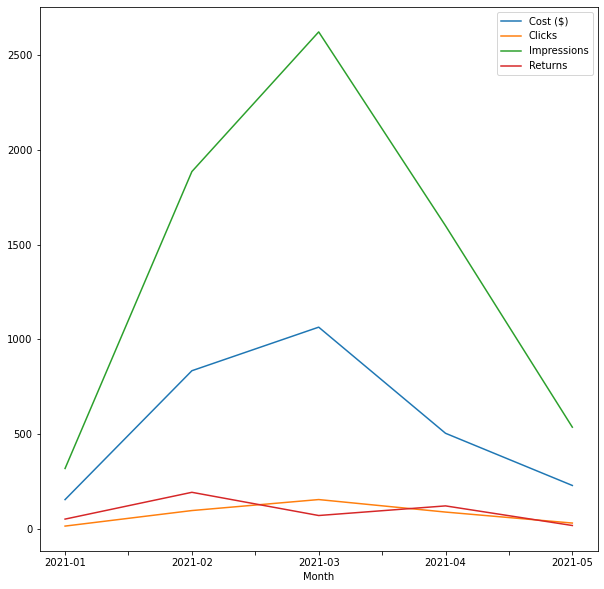

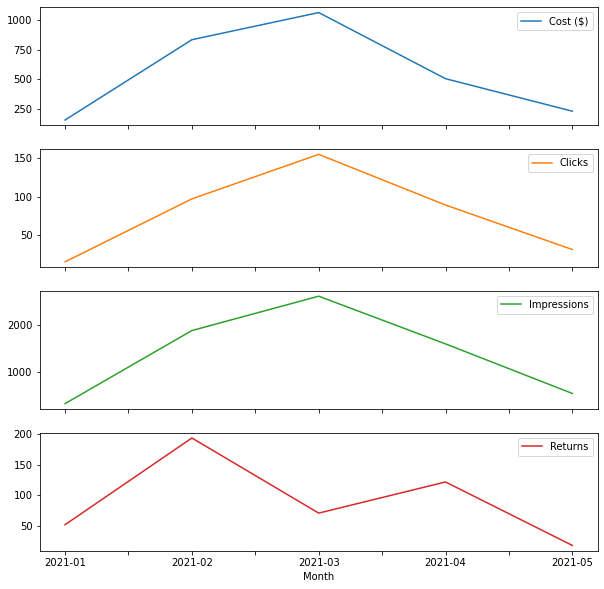

In [45]:
#Time-Series Analysis on Monthly report
df_monthly_filtered.drop(['Payment ($)'],axis=1).plot(x='Month',figsize = (10, 10))
df_monthly_filtered.drop(['Payment ($)'],axis=1).plot(subplots='True',x='Month',figsize = (10, 10))